In [1]:
# import pandas as pd

# df = pd.read_csv('data/medical_txt_classification.csv', index_col = 0)
# df

In [2]:
# df.groupby('medical_specialty').count().sort_values(by='description').index

In [3]:
# trgt_df = df[df['medical_specialty'].isin([' Neurology', ' Gastroenterology',
#        ' General Medicine', ' Radiology', ' Orthopedic',
#        ' Cardiovascular / Pulmonary'])]

In [4]:
# trgt_df.to_csv("data/MedTxt.csv", index=False)

# Text Classification with NB

## Dataset Loading

In [5]:
import pandas as pd 
med_txt = pd.read_csv("data/MedTxt.csv")
med_txt

,description,medical_specialty
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary
1,2-D Echocardiogram,Cardiovascular / Pulmonary
2,2-D Echocardiogram,Cardiovascular / Pulmonary
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary
...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary


In [6]:
med_txt.to_csv("data/MedTxt.csv", index=False)

## Exploring our data

In [7]:
example = med_txt.iloc[1300].to_list()

In [8]:
print("Text script: \n-----------\n", example[0])
print("\nText Class: \n----------\n", example[1])

Text script: 
-----------
  Mild-to-moderate diverticulosis.  She was referred for a screening colonoscopy.  There is no family history of colon cancer.  No evidence of polyps or malignancy.

Text Class: 
----------
  Gastroenterology


In [9]:
# Number of classes

classes = list(med_txt.medical_specialty.unique())
print("Number of classes : ", len(classes))
print("\n Classes: \n---------")
for c in classes:
    print(c)

Number of classes :  6

 Classes: 
---------
 Cardiovascular / Pulmonary
 Neurology
 General Medicine
 Radiology
 Orthopedic
 Gastroenterology


In [10]:
# Dataset distribution
data_dist = med_txt.groupby('medical_specialty', as_index=False).count()
data_dist.columns = ['Class', 'Num of examples']
total = data_dist['Num of examples'].sum()
data_dist['Percentage'] = data_dist['Num of examples'].apply(lambda x : x/total)
data_dist

,Class,Num of examples,Percentage
0,Cardiovascular / Pulmonary,372,0.217290
1,Gastroenterology,230,0.134346
2,General Medicine,259,0.151285
3,Neurology,223,0.130257
4,Orthopedic,355,0.207360
5,Radiology,273,0.159463


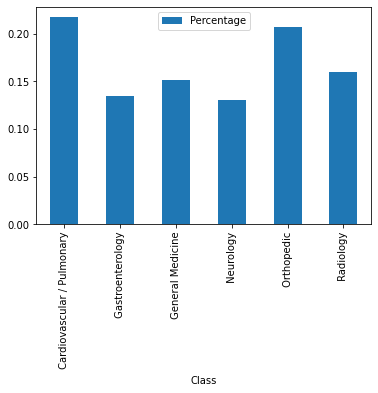

In [11]:
data_dist.plot.bar('Class', 'Percentage')

In [12]:
# Distribution of number of words per example
def count_words(txt):
    return len(txt.split())
med_txt['num_words'] = med_txt['description'].apply(count_words)
med_txt

,description,medical_specialty,num_words
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,3
1,2-D Echocardiogram,Cardiovascular / Pulmonary,2
2,2-D Echocardiogram,Cardiovascular / Pulmonary,2
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary,3
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,18
...,...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,22
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,20
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,20
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,32


In [13]:
med_txt.describe()

,num_words
count,1712.000000
mean,18.278621
std,12.240291
min,0.000000
25%,9.000000
50%,15.000000
75%,26.000000
max,76.000000


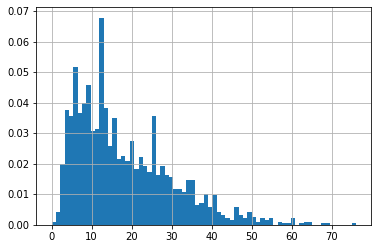

In [14]:
med_txt['num_words'].hist(bins=70, density=True)

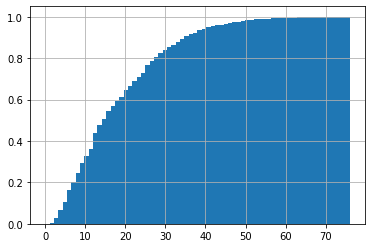

In [15]:
med_txt['num_words'].hist(bins=70, density=True, cumulative=True)

In [16]:
med_txt.num_words.sum()

31293

In [17]:
med_txt = med_txt[(med_txt.num_words >= 2) & (med_txt.num_words <= 65)]
med_txt

,description,medical_specialty,num_words
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,3
1,2-D Echocardiogram,Cardiovascular / Pulmonary,2
2,2-D Echocardiogram,Cardiovascular / Pulmonary,2
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary,3
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,18
...,...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,22
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,20
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,20
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,32


## Preprocessing

In [18]:
import string
stop_words = "i me my myself we our ours ourselves you your yours yourself yourselves he him his himself r she her hers herself it its itself they them their theirs themselves what which who whom this that these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t d m can will just don should now'"
stop_words = stop_words.split()
def preprocess_txt(txt):
    # all lower case 
    txt = txt.lower()
    #remove punctuation
    txt = txt.translate({ord(a) : ord(' ') for a in string.punctuation})
    #remove numbers 
    txt = " ".join([a for a in txt.split() if not a.isdigit()])
    # Remove stop_words 
    txt = " ".join([a for a in txt.split() if a not in stop_words])
    return txt

In [19]:
med_txt['description_processed'] = med_txt['description'].apply(preprocess_txt)
med_txt

/home/eslam/anaconda3/envs/ekyc/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,medical_specialty,num_words,description_processed
0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,3,mode doppler
1,2-D Echocardiogram,Cardiovascular / Pulmonary,2,echocardiogram
2,2-D Echocardiogram,Cardiovascular / Pulmonary,2,echocardiogram
3,Echocardiogram and Doppler,Cardiovascular / Pulmonary,3,echocardiogram doppler
4,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,18,normal left ventricle moderate biatrial enlarg...
...,...,...,...,...
1707,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,22,adenosine nuclear scan patient unable walk tre...
1708,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,20,patient presents chief complaint chest pain ad...
1709,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,20,patient recurrent left arm pain stent three da...
1710,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,32,patient markedly abnormal stress test severe c...


In [20]:
uniqu_words = set(" ".join(med_txt['description_processed'].to_list()).split())
uniqu_words

{'knees',
 'thalamic',
 'sleepiness',
 'midbrain',
 'tracheal',
 'im',
 'location',
 'gastrostomy',
 'discuss',
 'occluded',
 'power',
 'structural',
 'labs',
 'mattress',
 'source',
 'ble',
 'irritable',
 'random',
 'sidewalk',
 'ostectomy',
 'infiltrates',
 'sterile',
 'odynophagia',
 'series',
 'mechanical',
 'malleolus',
 'robotics',
 'happening',
 'dilemma',
 'complaints',
 'markedly',
 'gluteal',
 'bpp',
 'groin',
 'neuropathy',
 'instrumentation',
 'refractory',
 'septum',
 'reducing',
 'questionable',
 'pneumonia',
 'labrum',
 'epicondyle',
 'nissen',
 'lodged',
 'defect',
 'nyha',
 'ischemic',
 'compound',
 'basal',
 'exploration',
 'stumbled',
 'eating',
 'djd',
 'mixed',
 'relation',
 'transverse',
 'cirrhosis',
 'increased',
 'son',
 'occasionally',
 'surrounding',
 'bank',
 'got',
 'shunt',
 'lesser',
 'confused',
 'movements',
 'effusion',
 'target',
 'toilet',
 'dr',
 'diverticulectomy',
 'subdural',
 'bovie',
 'maximum',
 'ray',
 'regimen',
 'crowd',
 'endocarditis',
 '

In [21]:
from collections import Counter
word_counter = Counter(" ".join(med_txt['description_processed'].to_list()).split())
word_counter.most_common()

[('left', 507),
 ('right', 469),
 ('patient', 411),
 ('pain', 280),
 ('history', 185),
 ('old', 178),
 ('ct', 178),
 ('year', 160),
 ('chest', 131),
 ('mri', 125),
 ('disease', 119),
 ('contrast', 118),
 ('coronary', 104),
 ('female', 102),
 ('artery', 99),
 ('without', 97),
 ('cervical', 96),
 ('anterior', 96),
 ('spine', 95),
 ('bilateral', 88),
 ('knee', 82),
 ('normal', 81),
 ('post', 77),
 ('heart', 75),
 ('back', 75),
 ('brain', 74),
 ('upper', 71),
 ('status', 70),
 ('syndrome', 67),
 ('chronic', 65),
 ('lower', 62),
 ('acute', 60),
 ('foot', 59),
 ('shoulder', 59),
 ('fracture', 56),
 ('male', 56),
 ('abdominal', 56),
 ('internal', 56),
 ('hypertension', 55),
 ('posterior', 54),
 ('lumbar', 54),
 ('abdomen', 53),
 ('placement', 51),
 ('scan', 51),
 ('stenosis', 51),
 ('evaluation', 51),
 ('stress', 51),
 ('pulmonary', 51),
 ('l5', 50),
 ('fixation', 47),
 ('open', 47),
 ('severe', 46),
 ('secondary', 46),
 ('low', 46),
 ('lobe', 46),
 ('well', 45),
 ('atrial', 45),
 ('nerve', 4

In [22]:
len(uniqu_words)

3879

### Train Test split

In [23]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# train, test = train_test_split(med_txt[['description_processed', 'medical_specialty']], test_size=0.2)


In [24]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [25]:
import numpy as np 
X = np.array(med_txt['description_processed'])
Y = np.array(med_txt['medical_specialty'])

for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    

In [26]:
train = pd.DataFrame({"description_processed":X_train, "medical_specialty":Y_train})
train

,description_processed,medical_specialty
0,year old male history ischemic cardiomyopathy ...,Radiology
1,example template routine normal female physica...,General Medicine
2,left breast cancer nuclear medicine lymphatic ...,Radiology
3,left lower extremity venous doppler ultrasound,Cardiovascular / Pulmonary
4,arthroplasty right second digit hammertoe defo...,Orthopedic
...,...,...
1360,right foot trauma three views right foot three...,Orthopedic
1361,possible free air diaphragm chest x ray appear...,General Medicine
1362,coronary artery bypass surgery aortic stenosis...,Cardiovascular / Pulmonary
1363,dimensional simulation patient undergoing dime...,Radiology


In [27]:
test = pd.DataFrame({"description_processed":X_test, "medical_specialty":Y_test})
test

,description_processed,medical_specialty
0,white male onset chest pain history chest disc...,Cardiovascular / Pulmonary
1,carotid ultrasonic color flow imaging,Radiology
2,generalized abdominal pain nausea diarrhea rec...,Radiology
3,common ct c spine template,Neurology
4,ct cervical spine trauma ct examination cervic...,Radiology
...,...,...
337,left heart catheterization left ventriculograp...,Cardiovascular / Pulmonary
338,left distal bone forearm fracture closed reduc...,Orthopedic
339,year old white male dog bite right leg history...,General Medicine
340,right side craniotomy temporal lobe intracereb...,Neurology


## Feature Extraction

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer()
vectorizer.fit(med_txt.description_processed)
x_train_count = vectorizer.transform(train.description_processed)

In [29]:
x_train_count.shape

(1365, 3864)

In [30]:
y = train['medical_specialty']

In [31]:
from sklearn.naive_bayes import MultinomialNB
txt_classifer = MultinomialNB(alpha=2)
txt_classifer.fit(x_train_count,y)

MultinomialNB(alpha=2)

In [32]:
x_test_count = vectorizer.transform(test.description_processed)

In [33]:
predicted_probs = txt_classifer.predict_proba(x_test_count)
predicted_probs.shape

(342, 6)

In [34]:
from sklearn.metrics import top_k_accuracy_score
y_test_true = test['medical_specialty'].apply(lambda x: list(txt_classifer.classes_).index(x)).to_list()

In [39]:
top_k_accuracy_score(y_score=predicted_probs, y_true=y_test_true)

0.6549707602339181

In [36]:
predicted = txt_classifer.predict(x_test_count)

In [37]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

M = confusion_matrix(predicted, test['medical_specialty'], normalize = 'all')

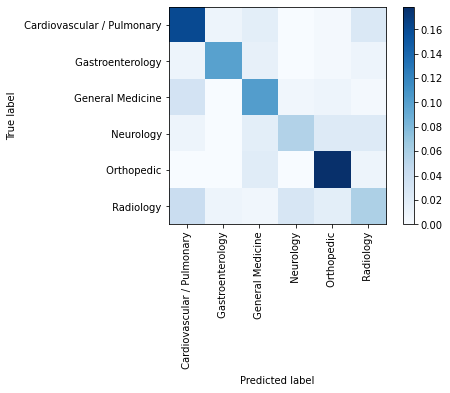

In [38]:
plot_confusion_matrix(txt_classifer, x_test_count, test['medical_specialty'], normalize = 'all', xticks_rotation='vertical', include_values= False, cmap='Blues') 